Решить задачу просрочки кредита используя для прогназирования нейронные сети. Посмотреть работу с несбалансированными данными. 


Набор данных представляет собой исторические данные по 251503 заемщикам (https://www.kaggle.com/c/GiveMeSomeCredit/data ).
Задача является бинарной классификацией. Цель - предсказать будет ли тот или иной заемщик испытывать финансовые трудности в ближайшие 2 года, т.е. будет ли просрочка по займу. 
Выборка разделена на тренировочную и тестовую ( 150000 в тренировочной части, 101503 в тестовой).



### Описание признаков

* 1 - __SeriousDlqin2yrs__ - будет ли просрочка более 90 дней в ближайшие 2 года (целевая метка) (Да/Нет)
* 2 - __RevolvingUtilizationOfUnsecuredLines__ - общий баланс по кредитным картам и кредитным линиям, за исключением задолженностей по недвижимости задолженности по взносам, деленные на сумму кредитных лимитов (проценты)
* 3 - __age__ - Возраст заемщика (в годах)
* 4 - __NumberOfTime30-59DaysPastDueNotWorse__ - количество просрочек в 30-59 дней (Целое)
* 5 - __DebtRatio__ - коэффициент задолженности, т.е. сумма ежемесячных платежей по долгам, алиментов и расходов на проживание, деленная на месячный доналоговый доход (проценты)
* 6 - __Monthly Income__ - месячный доход (число с плавающей точкой)
* 7 - __NumberOfOpenCreditLinesAndLoans__ - количество открытых кредитов и кредитных линий (Целое)
* 8 - __NumberOfTimes90DaysLate__ - количество просрочек более 90 дней (Целое)
* 9 - __NumberRealEstateLoansOrLines__ - количество ипотечных кредитов и кредитов на недвижимость, включая кредитные линии домашнего капитала (Целое)
* 10 - __NumberOfTime60-89DaysPastDueNotWorse__ - количество просрочек в 60-89 дней за последние 2 года (Целое)
* 11 - __NumberOfDependents__ - количество иждивенцев в семье (исключая самих заемщиков) (Целое)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

In [3]:
df = pd.read_csv('GiveMeSomeCredit/cs-training.csv', index_col=0)
df_test=pd.read_csv('GiveMeSomeCredit/cs-test.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
# Посмотрим есть пропущенные значения
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

Есть пропущенные значения

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


<Axes: >

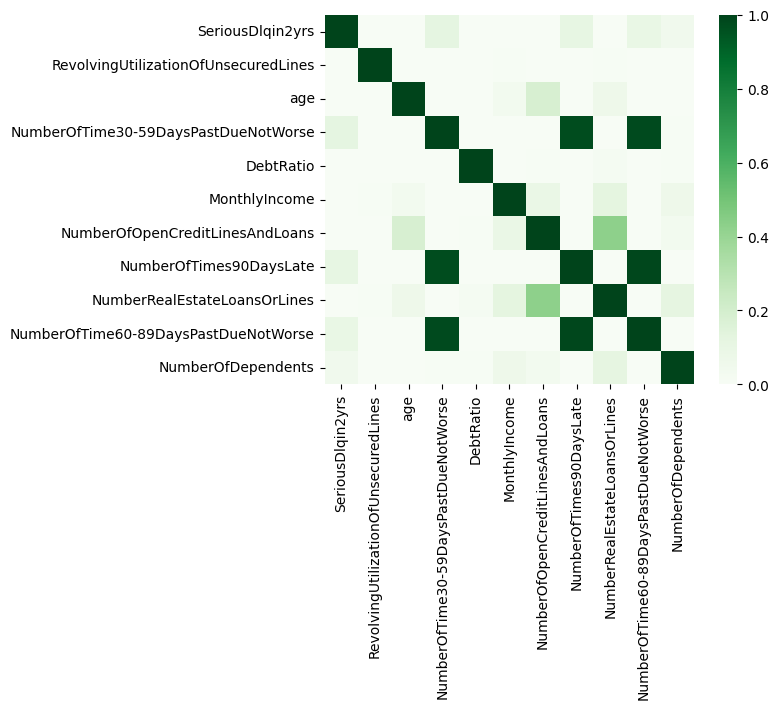

In [7]:
# Посмотрим на корелляцию данных
corrs = df.dropna().corr().round(3)
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)

Есть слабая зависимость NumberOfDependents от MonthlyIncome


Проверим и заполним пропущенные значения в зависимости от результатов

In [8]:
# Посмотрим среднее значение NumberOfDependents
df['NumberOfDependents'].mean()

0.7572222678605657

Проверим гипотезу что если у человека доход выше среднего, то вероятнее всего он не один.

In [9]:
MEAN_MONTHLY_INCOME = df['MonthlyIncome'].mean()
MEAN_MONTHLY_INCOME

6670.221237392844

In [10]:
# Посмотрим на количество неодиноких людей с доходом выше среднего
len(df['MonthlyIncome'][df['MonthlyIncome'] > MEAN_MONTHLY_INCOME][df[df['MonthlyIncome'] > MEAN_MONTHLY_INCOME]['NumberOfDependents'] >= 1])

24548

In [11]:
# Посмотрим на количество одиноких людей с доходом выше среднего
len(df['MonthlyIncome'][df['MonthlyIncome'] > MEAN_MONTHLY_INCOME][df[df['MonthlyIncome'] > MEAN_MONTHLY_INCOME]['NumberOfDependents'] < 1])

19598

In [12]:
df['NumberOfDependents'][df['MonthlyIncome'] > MEAN_MONTHLY_INCOME][df[df['MonthlyIncome'] > MEAN_MONTHLY_INCOME]['NumberOfDependents'] >= 1].mean()

1.965170278637771

Видим что количество неодиноких людей с доходом выше среднего больше чем одиноких. 24548 в сравнении с 19598.

Следовательно пропущенным значениям для людей с доходом выше среднего присваиваю значение 2.

Теперь посмотрим на людей с доходом ниже среднего

In [13]:
# Посмотрим на количество неодиноких людей с доходом ниже среднего
len(df['MonthlyIncome'][df['MonthlyIncome'] < MEAN_MONTHLY_INCOME][df[df['MonthlyIncome'] < MEAN_MONTHLY_INCOME]['NumberOfDependents'] >= 1])

30265

In [14]:
# Посмотрим на количество одиноких людей с доходом ниже среднего
len(df['MonthlyIncome'][df['MonthlyIncome'] < MEAN_MONTHLY_INCOME][df[df['MonthlyIncome'] < MEAN_MONTHLY_INCOME]['NumberOfDependents'] < 1])

45858

Видим что количество неодиноких людей с доходом ниже среднего меньше чем одиноких. 30265 в сравнении с 45858.

Следовательно пропущенным значениям для людей с доходом ниже среднего присваиваю значение 0.

In [15]:
mask = df['NumberOfDependents'].isnull()
df_na = df[mask]
df_na['NumberOfDependents']= np.where(df_na['MonthlyIncome'] > MEAN_MONTHLY_INCOME, 2, 0)
df.update(df_na)

C:\Users\User\AppData\Local\Temp\ipykernel_28356\1000087820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['NumberOfDependents']= np.where(df_na['MonthlyIncome'] > MEAN_MONTHLY_INCOME, 2, 0)


In [16]:
# Проверим
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

<Axes: >

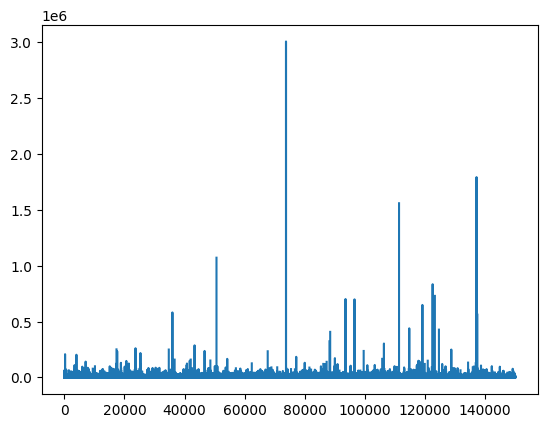

In [17]:
# Посмотрим на доход 
df['MonthlyIncome'].plot()


In [18]:
# Найдем среднее значениее дохода без экстремальных значений
mean_MonthlyIncome = df[df['MonthlyIncome'] < 50000]['MonthlyIncome'].mean()
mean_MonthlyIncome

6356.334469936973

In [19]:
# Заполним пропущенные значения дохода средним значением без экстремальных
df['MonthlyIncome'].fillna(mean_MonthlyIncome, inplace=True)

In [20]:
# Убедимся что все пропущенные значения заполнены
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtypes: fl

In [21]:
#Оценим количество вернувших и не вернувших кредит.
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

Видим что данные несбалансированы.

## Попробуем обучить модель на несбалансированных данных

In [22]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, roc_curve


In [57]:
X = df.drop(['SeriousDlqin2yrs'], axis = 1)
y = df['SeriousDlqin2yrs']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = CatBoostClassifier(random_state=42,
                           thread_count=-1,eval_metric='F1', class_weights=[1, 100])
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=True, 
          early_stopping_rounds=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.103387
0:	learn: 0.9351496	test: 0.9331104	best: 0.9331104 (0)	total: 14.2ms	remaining: 14.2s
100:	learn: 0.9441320	test: 0.9376861	best: 0.9390154 (39)	total: 1.21s	remaining: 10.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9390153795
bestIteration = 39

Shrink model to first 40 iterations.


In [60]:
y_pred = model.predict(X_test)

In [61]:
confusion_matrix(y_test, y_pred)

array([[ 6818, 21226],
       [   37,  1919]], dtype=int64)

Очень много тех, кого ложно квалифицирует как положительные

In [62]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.6121009010380708


In [63]:
recall_score(y_test, y_pred)

0.9810838445807771

In [64]:
deepl_fpr, deepl_tpr, deepl_threshold   = roc_curve(y_test, y_pred)

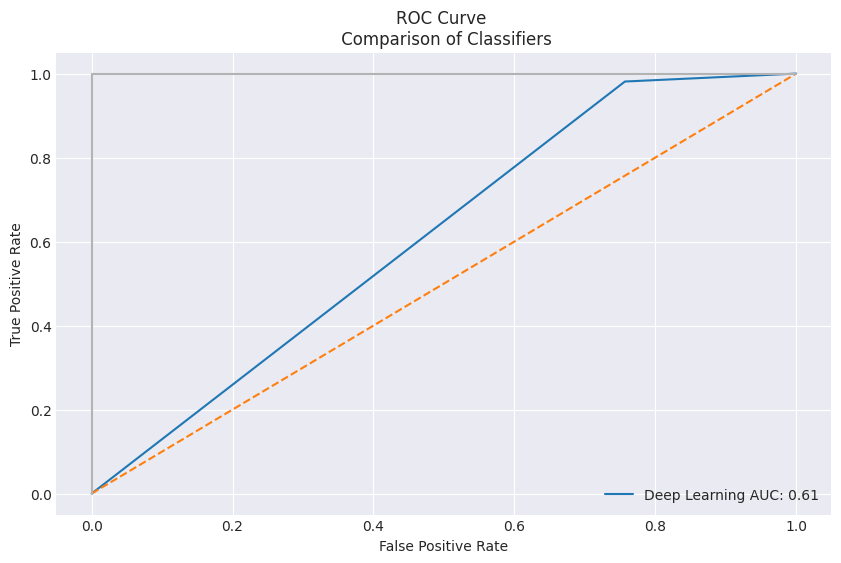

In [65]:
# Plot ROC curves
fig  = plt.figure(figsize=(10,6))
plt.title('ROC Curve \n Comparison of Classifiers')
plt.plot(deepl_fpr, deepl_tpr, label ='Deep Learning AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## Попробуем обучить модель на сбалансированных данных

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
sm = SMOTE(random_state=42, k_neighbors=5)

In [68]:
X_res, y_res = sm.fit_resample(X, y)

In [69]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
model2 = CatBoostClassifier(random_state=42,
                           thread_count=-1,eval_metric='F1', class_weights=[1, 100])
model2.fit(X_train_res, y_train_res, 
          eval_set=(X_test_res, y_test_res),
          verbose=100, plot=True, 
          early_stopping_rounds=100)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.120615
0:	learn: 0.9950187	test: 0.9950496	best: 0.9950496 (0)	total: 21.5ms	remaining: 21.4s
100:	learn: 0.9952016	test: 0.9950524	best: 0.9950644 (24)	total: 2.01s	remaining: 17.9s
200:	learn: 0.9952683	test: 0.9950664	best: 0.9950939 (119)	total: 3.73s	remaining: 14.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9950938807
bestIteration = 119

Shrink model to first 120 iterations.


In [70]:
y_pred = model2.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred)

array([[ 1607, 26437],
       [    3,  1953]], dtype=int64)

In [72]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.5278845337694579


In [73]:
recall_score(y_test, y_pred)

0.9984662576687117

In [74]:
deepl_fpr, deepl_tpr, deepl_threshold   = roc_curve(y_test, y_pred)

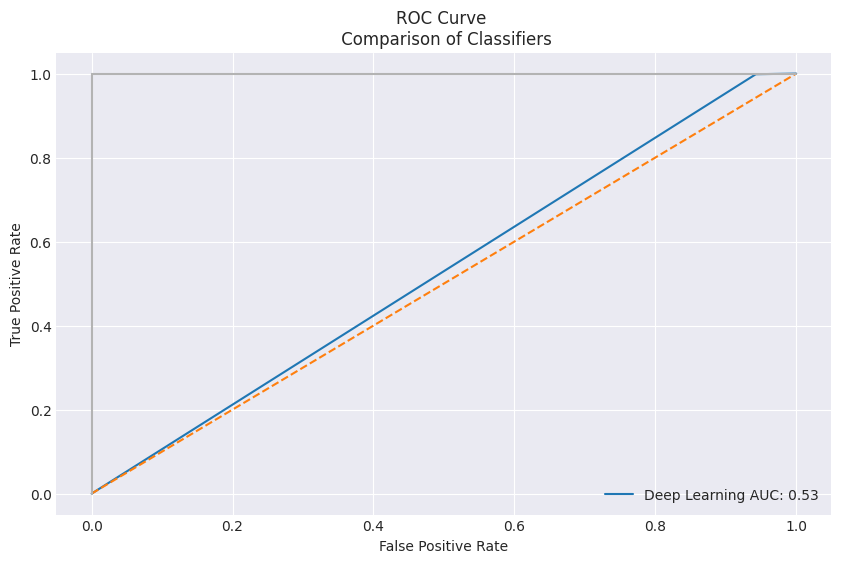

In [75]:
# Plot ROC curves
fig  = plt.figure(figsize=(10,6))
plt.title('ROC Curve \n Comparison of Classifiers')
plt.plot(deepl_fpr, deepl_tpr, label ='Deep Learning AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Результаты так себе, почему-то классические методы плохо работают